
### 1. Introduction to Regularization
Regularization is a technique to prevent overfitting in linear regression by adding a penalty term to the cost function. This penalty discourages large coefficients and helps improve the model's generalization.

Two commonly used regularization techniques are:
- **Ridge Regression** (L2 Regularization)
- **Lasso Regression** (L1 Regularization)

- Lasso and Ridge regression are regularization techniques used to improve the performance of linear regression models by addressing overfitting and multicollinearity. They differ in how they penalize model coefficients, making them suitable for different scenarios.

### When to Use Lasso Regression?

- Lasso regression, or L1 regularization, is ideal when you suspect that only a subset of predictors is important. It adds a penalty based on the absolute values of the coefficients, which can shrink some coefficients to exactly zero. This makes Lasso effective for feature selection, as it automatically excludes irrelevant predictors.

- For example, in high-dimensional datasets like genetic studies, where only a few genes out of thousands are relevant, Lasso helps identify the most impactful features while ignoring the rest. It is best suited when you aim to simplify the model by retaining only the most significant predictors.

### When to Use Ridge Regression?

- Ridge regression, or L2 regularization, is more appropriate when all predictors are potentially relevant. It adds a penalty proportional to the square of the coefficients, shrinking them towards zero but not eliminating any. This ensures that all features contribute to the model, albeit with reduced influence, which helps mitigate overfitting.

- For instance, in predicting house prices, where features like size, location, and number of bedrooms are all relevant, Ridge regression ensures that no feature is excluded while controlling the magnitude of their coefficients. It is particularly useful when multicollinearity exists among predictors.

### Key Differences

- Lasso performs feature selection by setting some coefficients to zero, making it suitable for sparse models. Ridge, on the other hand, retains all predictors and is better for scenarios where all features are important. Ridge is computationally faster, while Lasso may require more time due to its feature selection process.

- By understanding the nature of your data and the importance of predictors, you can choose between Lasso and Ridge regression to optimize model performance.

### 2. Standard Linear Regression Model

For a linear regression model:

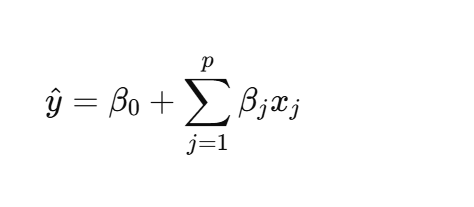

Where:
- \( y \) = Target variable
- \( x_j \) = Feature variables
- \( \beta_j \) = Coefficients
- \( \epsilon \) = Error term

The Ordinary Least Squares (OLS) cost function is:

\[
J(\beta) = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{n} (y_i - (\beta_0 + \sum_{j=1}^{p} \beta_j x_{ij}))^2
\]

---


### 3. Ridge Regression (L2 Regularization)

### Ridge Cost Function:
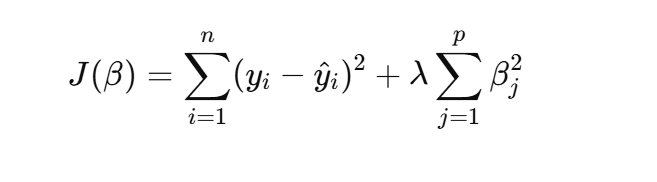

Where:
- The second term is the **L2 penalty** (sum of squared coefficients).
- \( \lambda \geq 0 \) is the regularization parameter.

**Effect of \( \lambda \):**
- If \( \lambda = 0 \): Ridge becomes OLS (no regularization).
- If \( \lambda \) is large: Coefficients shrink towards zero but never exactly zero.

---



### 4. Lasso Regression (L1 Regularization)

### Lasso Cost Function:

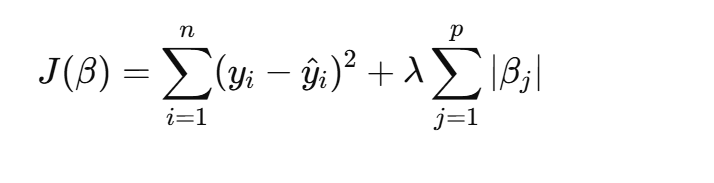
- The penalty term is the **L1 norm** of the coefficients (absolute values).
- Encourages some coefficients to become **exactly zero** → performs **feature selection**.

---

### 5. Comparison: Ridge vs Lasso

| Aspect      | Ridge (L2)                              | Lasso (L1)                      |
|------------|-----------------------------------------|---------------------------------|
| Penalty    | \( \sum \beta_j^2 \)                  | \( \sum |\beta_j| \)           |
| Shrinks Coefficients | Yes                               | Yes                             |
| Sets Coefficients to Zero | No                                | Yes (Sparse model)             |
| Use Case   | Multicollinearity handling             | Feature selection               |

---

### 6. Regularization Path Behavior

- Ridge: Coefficients gradually shrink but remain non-zero.
- Lasso: Coefficients shrink and some become exactly zero as \( \lambda \) increases.

---

### 7. Key Hyperparameter
- \( \lambda \) (or `alpha` in scikit-learn) controls the strength of the regularization.
- Higher \( \lambda \): Stronger regularization → smaller coefficients.
- Lower \( \lambda \): Weaker regularization → behaves like OLS.

---

### 8. Geometric Interpretation
- **Ridge:** Constrains coefficients within a circle (L2 norm ball).
- **Lasso:** Constrains coefficients within a diamond (L1 norm ball), leading to sparsity.

---

### 9. When to Use?
- **Ridge:** When all features are relevant and we want to reduce overfitting.
- **Lasso:** When we need automatic feature selection and a sparse model.

---

### 10. Combined Approach: Elastic Net
Elastic Net combines L1 and L2 penalties:

\[
J(\beta) = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda_1 \sum |\beta_j| + \lambda_2 \sum \beta_j^2
\]

This balances feature selection (Lasso) and coefficient shrinkage (Ridge).

### Simple example using Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split

# Generate synthetic dataset
np.random.seed(42)
X = np.random.randn(100, 10)  # 10 features
true_coefs = np.array([5, 0, 0, 4, 0, 0, 3, 0, 0, 2])  # Sparse true coefficients
y = X.dot(true_coefs) + np.random.randn(100) * 0.5

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Range of alpha values for comparison
alphas = np.logspace(-3, 1, 50)

ridge_coefs = []
lasso_coefs = []

for a in alphas:
    ridge = Ridge(alpha=a)
    lasso = Lasso(alpha=a, max_iter=10000)
    
    ridge.fit(X_train, y_train)
    lasso.fit(X_train, y_train)
    
    ridge_coefs.append(ridge.coef_)
    lasso_coefs.append(lasso.coef_)

ridge_coefs = np.array(ridge_coefs)
lasso_coefs = np.array(lasso_coefs)


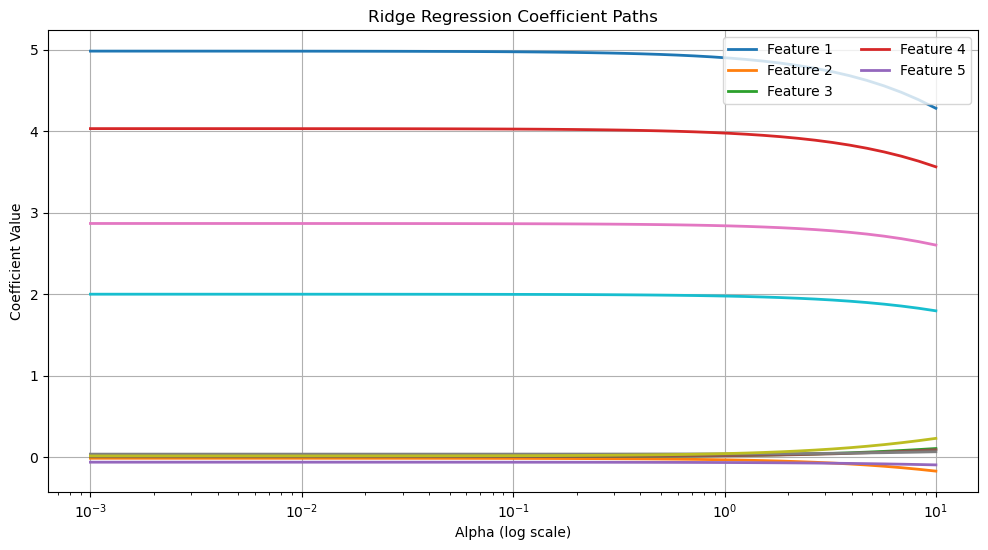

In [2]:
#Plot Ridge Coefficient Paths
plt.figure(figsize=(12,6))
for i in range(X.shape[1]):
    plt.plot(alphas, ridge_coefs[:, i], label=f'Feature {i+1}' if i < 5 else "", linewidth=2)
plt.xscale('log')
plt.title('Ridge Regression Coefficient Paths')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Coefficient Value')
plt.legend(loc='upper right', ncol=2)
plt.grid(True)
plt.show()


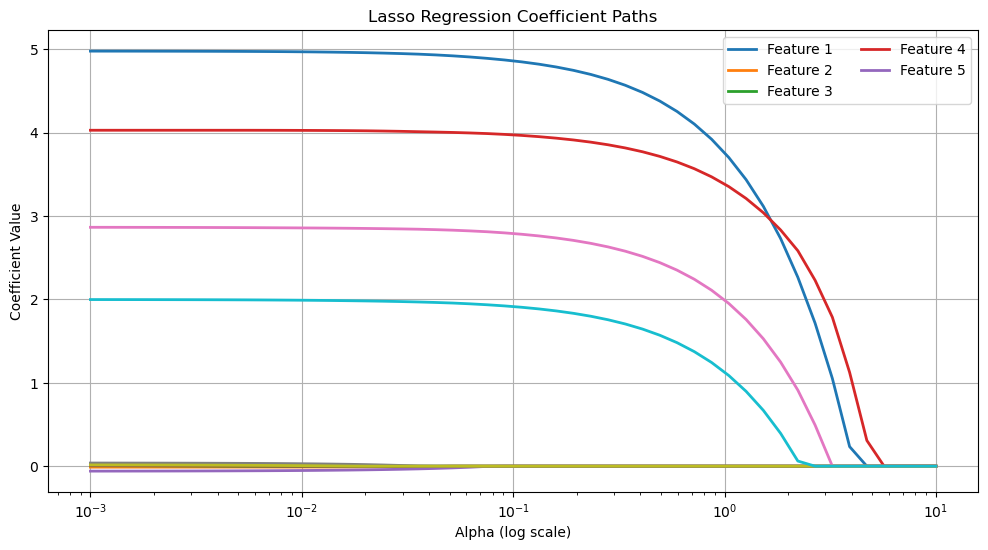

In [3]:
#Plot Lasso Coefficient Paths
plt.figure(figsize=(12,6))
for i in range(X.shape[1]):
    plt.plot(alphas, lasso_coefs[:, i], label=f'Feature {i+1}' if i < 5 else "", linewidth=2)
plt.xscale('log')
plt.title('Lasso Regression Coefficient Paths')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Coefficient Value')
plt.legend(loc='upper right', ncol=2)
plt.grid(True)
plt.show()


### Observations:
- **Ridge:** Coefficients shrink gradually as alpha increases, but none become exactly zero.
- **Lasso:** Coefficients shrink and some become exactly zero as alpha increases → feature selection.





### Example using Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


# Load data
h_price = pd.read_csv('house_data.csv')  # Save the above CSV data as 'house_data.csv'


In [ ]:
h_price.head(11)
#h_price.shape

In [ ]:
# check for null
h_price.isnull().sum()

### Features and target
- Splitting the data prevents data leakage and helps evaluate performance on unseen data.

- StandardScaler standardizes features (mean=0, std=1) — essential for regularized models to treat all features fairly.

In [ ]:
# Features and target
X = h_price.drop(columns=['Price'])
y = h_price['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Ridge regression

- Ridge adds L2 penalty (squares of coefficients) to reduce model complexity.

- Good for multicollinearity (when features are correlated).

- Helps prevent overfitting by shrinking large coefficients.

In [ ]:
house_model_ridge = Ridge(alpha=.1)
house_model_ridge.fit(X_train_scaled, y_train)
y_pred_ridge = house_model_ridge.predict(X_test_scaled)

print("Ridge Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("R² Score:", r2_score(y_test, y_pred_ridge))


In [ ]:
from sklearn.linear_model import RidgeCV
alphas = [0.01,0.1,1,10]
ridge =RidgeCV(alphas=alphas,cv=4)
ridge.fit(X_train_scaled, y_train)
print("Best alpha,", ridge.alpha_)

### Lasso 

- Lasso adds L1 penalty (absolute values of coefficients).

- Drives some coefficients to zero → helps with feature selection.

- Best when you suspect some features may be irrelevant.

In [ ]:
house_model_lasso = Lasso(alpha=0.1)
house_model_lasso.fit(X_train_scaled, y_train)
y_pred_lasso = house_model_lasso.predict(X_test_scaled)

print("Lasso Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("R² Score:", r2_score(y_test, y_pred_lasso))


### ElasticNet 
- Combines both L1 and L2 penalties (Ridge + Lasso).

- Useful when you expect both feature selection and coefficient shrinkage are needed.

In [ ]:
house_model_elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
house_model_elastic.fit(X_train_scaled, y_train)
y_pred_elastic = house_model_elastic.predict(X_test_scaled)

print("Elastic Net Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_elastic))
print("R² Score:", r2_score(y_test, y_pred_elastic))


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='True Values', marker='o')
plt.plot(y_pred_ridge, label='Ridge Predicted')
plt.plot(y_pred_lasso, label='Lasso Predicted')
plt.plot(y_pred_elastic, label='ElasticNet Predicted')
plt.legend()
plt.title("True vs Predicted House Prices")
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.grid(True)
plt.show()


### Visualize the magnitude and sparsity of model coefficients.

- Lasso  shows zero values for less important features.

- Ridge keeps all coefficients but shrinks them.

- ElasticNet shows a hybrid behavior.



In [ ]:
feature_names = X.columns

plt.figure(figsize=(12, 6))
plt.plot(house_model_ridge.coef_, label='Ridge', marker='o')
plt.plot(house_model_lasso.coef_, label='Lasso', marker='x')
plt.plot(house_model_elastic.coef_, label='ElasticNet', marker='s')
plt.xticks(ticks=np.arange(len(feature_names)), labels=feature_names, rotation=45)
plt.title("Comparison of Coefficients Across Models")
plt.ylabel("Coefficient Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### regularization strength (alpha) shrinks coefficients.

- Lasso will start dropping features (to 0) as alpha increases.

- Ridge shrinks but never zeroes out coefficients.

In [ ]:
alphas = np.logspace(-4, 2, 100)
ridge_coefs = []
lasso_coefs = []

for alpha in alphas:
    house_model_ridge = Ridge(alpha=alpha)
    house_model_lasso = Lasso(alpha=alpha)
    
    house_model_ridge.fit(X_train_scaled, y_train)
    house_model_lasso.fit(X_train_scaled, y_train)
    
    ridge_coefs.append(house_model_ridge.coef_)
    lasso_coefs.append(house_model_lasso.coef_)

# Ridge plot
plt.figure(figsize=(12, 6))
plt.plot(alphas, ridge_coefs)
plt.xscale('log')
plt.title("Ridge Coefficients vs Alpha")
plt.xlabel("Alpha (log scale)")
plt.ylabel("Coefficient values")
plt.grid(True)
plt.show()

# Lasso plot
plt.figure(figsize=(12, 6))
plt.plot(alphas, lasso_coefs)
plt.xscale('log')
plt.title("Lasso Coefficients vs Alpha")
plt.xlabel("Alpha (log scale)")
plt.ylabel("Coefficient values")
plt.grid(True)
plt.show()


## Grid Search for h_price Data

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
## Define Parameter Grids
ridge_params = {'alpha': np.logspace(-4, 2, 50)}
lasso_params = {'alpha': np.logspace(-4, 2, 50)}
elastic_params = {
    'alpha': np.logspace(-4, 2, 10),
    'l1_ratio': np.linspace(0.1, 0.9, 9)
}


- alpha controls the strength of regularization.

- l1_ratio controls the mix of L1 and L2 for ElasticNet.

In [ ]:
## Grid Search for Ridge
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=2, scoring='r2')
ridge_grid.fit(X_train_scaled, y_train)

print("Best Ridge alpha:", ridge_grid.best_params_['alpha'])
print("Best Ridge R² score (CV):", ridge_grid.best_score_)


In [ ]:
## Grid search for Lasso 
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=2, scoring='r2')
lasso_grid.fit(X_train_scaled, y_train)

print("Best Lasso alpha:", lasso_grid.best_params_['alpha'])
print("Best Lasso R² score (CV):", lasso_grid.best_score_)


In [ ]:
#Grid Search for ElasticNet
elastic_grid = GridSearchCV(ElasticNet(), elastic_params, cv=2, scoring='r2')
elastic_grid.fit(X_train_scaled, y_train)

print("Best ElasticNet params:", elastic_grid.best_params_)
print("Best ElasticNet R² score (CV):", elastic_grid.best_score_)


In [ ]:
#Test Set Evaluation of Best Models
best_ridge = ridge_grid.best_estimator_
best_lasso = lasso_grid.best_estimator_
best_elastic = elastic_grid.best_estimator_

y_pred_ridge = best_ridge.predict(X_test_scaled)
y_pred_lasso = best_lasso.predict(X_test_scaled)
y_pred_elastic = best_elastic.predict(X_test_scaled)

print("Test R² (Ridge):", r2_score(y_test, y_pred_ridge))
print("Test R² (Lasso):", r2_score(y_test, y_pred_lasso))
print("Test R² (ElasticNet):", r2_score(y_test, y_pred_elastic))


## Best Hyperparameters Identified (from Grid Search)



### Interpretation in 5 Key Points

1.  All Three Models Performed Exceptionally Well

  - Each model has a **Test R² ≈ 0.98**, meaning they explain \~98% of the variance in house prices on unseen test data.
   - This indicates a **very strong fit** — your features are highly predictive.

2. **Ridge Regression Had the Slight Edge**

   *ElasticNet delivered the **highest Test R²** (0.98192), outperforming Lasso and ElasticNet by a very small margin.
   *This suggests **Elastic was slightly better at generalizing** on the test set — possibly due to better handling of multicollinearity.

3. **Lasso Nearly Equal but May Offer Feature Selection**

   *Lasso scored 0.98191 — almost identical to Ridge.
   *Even if slightly lower in R², it may be preferred if **sparse models or feature elimination** are desirable (e.g., fewer predictors).

4. **ElasticNet Balanced Performance**

   * ElasticNet, which blends Ridge and Lasso, had the **lowest R²** (0.98184) — but the difference is very minor.
   * It may still be preferred if you want both **feature selection (via L1)** and **multicollinearity handling (via L2)**.

5. **Decision Implication**

   * Since **performance differences are minimal**, your choice should depend on **secondary criteria**:

     * **Interpretability** → Lasso
     * **Stability with correlated features** → Ridge
     * **Balanced regularization** → ElasticNet
   * If you just want **maximum predictive performance**, Ridge wins by a small margin here.



